### __Blobs Dataset__

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [61]:
XB,YB=make_blobs(n_samples=1000,n_features=2,centers=5,random_state=69)## to generate data for clustering problem

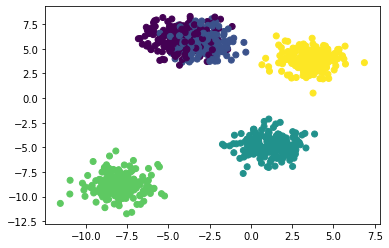

In [62]:
plt.scatter(XB[:,0],XB[:,1],c=YB)

In [63]:
XB[:5]

array([[-2.34960128,  5.740138  ],
       [-2.78160139,  6.29391461],
       [ 0.83556951, -5.97950498],
       [-3.35447121,  5.8928208 ],
       [ 1.53274035, -4.88116958]])

### Perceptron (Artificial Neuron)
- Learning Goals
    - How to implement preceptron?
    - Understanding vectorization,writing efficient code without using for loop
    - What is the meaning of linear classifier

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

#### Generating Data

In [141]:
X,Y= make_blobs(n_samples=550,centers=2,n_features=2,random_state=11)

In [142]:
print(X.shape,Y.shape)

(550, 2) (550,)


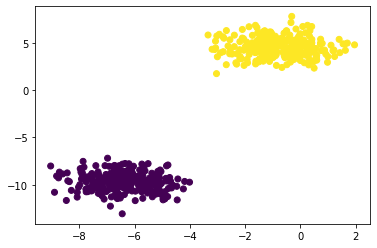

In [143]:
plt.scatter(X[:,0],X[:,1],c=Y)

#### Model and helper functions

In [144]:
def sigmoid(z):
    return (1.0)/(1+np.exp(-z))

In [145]:
# sigmoid
z=np.array([1,2,3,4,5])
sigmoid(z)# sigmoid of all the elements of array


array([0.73105858, 0.88079708, 0.95257413, 0.98201379, 0.99330715])

#### Implement Perceptron Learning Algorithm
- Learn the weights
- Reduce the loss
- Make the predictions

In [146]:
def predict(X,weights):
    """ Here X is matrix where no. of columns is no. of features 
    of each example and W is (nx1) vector 
    that is weight vector,-->z will be a m x 1 vector"""
    
    z=np.dot(X,weights)
    predictions=sigmoid(z)
    return predictions

def loss(X,Y,weights):
    """ Binary cross entropy"""
    Y_=predict(X,weights)#Y_ is y hat that we studied in theoru
    cost=np.mean(-Y*np.log(Y_) - (1-Y)*np.log(1-Y_))
    return cost

def update(X,Y,weights,learning_rate):
    """ Perform Weight updates for I epoch"""
    Y_= predict(X,weights)
    m=X.shape[0]
    dw=np.dot(X.T,Y_ - Y)/float(m)# dw is deJ(w)/delw
    weights=weights - learning_rate*dw
    return weights

def train(X,Y,learning_rate=0.4,maxEpochs=1000):
    # modify the input to handle the bias term
    ones=np.ones((X.shape[0],1))
    X=np.hstack((ones,X))
    # Init weights 0
    weights = np.zeros(X.shape[1])#n+1 entries[n are the no. of features of data(hence number of weights to be multiplied) , n+1th feature] is the bias
    # Iterate over all epochs and make updates
    for epoch in range(maxEpochs):
        weights=update(X,Y,weights,learning_rate)
        
        if epoch%50==0:
            l=loss(X,Y,weights)
            print("Epoch %d Loss %.4f"%(epoch,l))
    return weights        

In [147]:
weights=train(X,Y)

Epoch 0 Loss 0.0038
Epoch 50 Loss 0.0019
Epoch 100 Loss 0.0013
Epoch 150 Loss 0.0010
Epoch 200 Loss 0.0008
Epoch 250 Loss 0.0007
Epoch 300 Loss 0.0006
Epoch 350 Loss 0.0005
Epoch 400 Loss 0.0005
Epoch 450 Loss 0.0004
Epoch 500 Loss 0.0004
Epoch 550 Loss 0.0003
Epoch 600 Loss 0.0003
Epoch 650 Loss 0.0003
Epoch 700 Loss 0.0003
Epoch 750 Loss 0.0003
Epoch 800 Loss 0.0003
Epoch 850 Loss 0.0002
Epoch 900 Loss 0.0002
Epoch 950 Loss 0.0002


### Perceptron Implementation - Part2
- Make Predictions
- Visualise Decision Surface
- Linear vs Non-Linear Classification

In [154]:
def getPredictions(X_test,weights,labels=True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones((X_test.shape[0],1))
        X_test=np.hstack((ones,X_test))
        
    probs = predict(X_test,weights)
    if not labels:
        return probs
    else:
        labels=np.zeros(probs.shape)
        labels[probs>=0.5]=1
        return labels

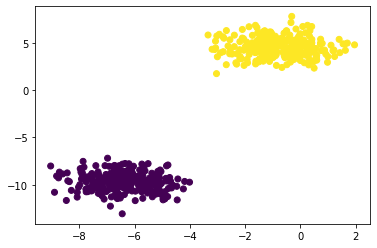

In [155]:
plt.scatter(X[:,0],X[:,1],c=Y)

In [156]:
weights

array([0.24081142, 0.17122244, 2.13272149])

__So our goal now is to plot one hypothesis,we want to make a boundary for classification. As on x-axis feature is x1 and on y-axis feature is x2. so the equation line seperating the classes will be w0+w1*x1+w2*x2 =0--> x2= -(w0+w1*x1)/w2__


In [157]:
x1= np.linspace(-8,2,10)
# print(x1)
x2= -(weights[0]+ weights[1]*x1)/weights[2]


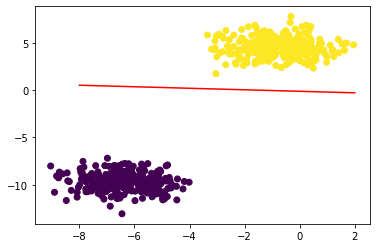

In [158]:
plt.scatter(X[:,0],X[:,1],c=Y)
plt.plot(x1,x2,c='red')
plt.show()

#### Plot for random_state=21
<img src="images/perceptron.png" alt="Drawing" style="width: 510px;"/>


In [163]:
# Find the accuracy
Ypred=getPredictions(X,weights,labels=True)
training_acc=np.sum(Ypred==Y)/Y.shape[0]
print(training_acc)

1.0
